## Exercice 1

In [1]:
!pip3 install urllib3
!pip3 install pandas
!pip3 install numpy

In [2]:
# Retrieve prediction from the wiidii model hosted on docker webservice 
import urllib.request
# Structure of persistant data
import json 

# Manipulation of tabular data
import pandas as pd
# Calculations with numericals
import numpy as np

In [3]:
#Reading training_set file 
with open('training_set.json', encoding="utf8") as json_file:
    training_data = json.load(json_file)
    
#Reading testing_set file 
with open('testing_set.json', encoding="utf8") as json_file:
    testing_data = json.load(json_file)

In [4]:
# Parsing data from json structure to pandas Dataframe structure
dataset_train = np.array([sample["sentence"] for sample in training_data])
target_train  = np.array([sample["intent"] for sample in training_data])

dataset_test = np.array([sample["sentence"] for sample in testing_data])
target_test  = np.array([sample["intent"] for sample in testing_data])

In [5]:
# Checking shapes
print(f"Dataset shape : {dataset_train.shape}");
print(f"Target  shape : {target_train.shape}\n");

print(f"Dataset shape : {dataset_test.shape}");
print(f"Target  shape : {target_test.shape}");

Dataset shape : (6035,)
Target  shape : (6035,)

Dataset shape : (1065,)
Target  shape : (1065,)


In [10]:
# Changing types for better visualisation & computations
x_train = pd.DataFrame(dataset_train,columns=["Sentence"])
y_train = pd.DataFrame(target_train, columns=["Intent"])

x_test = pd.DataFrame(dataset_test,columns=["Sentence"])
y_test = pd.DataFrame(target_test, columns=["Intent"])

In [12]:
def study_data(x):
    # Studying input data
    print(x.head())
    print("\n")
    # Missing value
    print(x.info())
    print("\n")
    # x.describe() no need for descriptive stats because categorical object

study_data(x_test)

                                            Sentence
0            Tu sais où je peux acheter un bazooka ?
1                 déco de maison style maison ferret
2                      j&#39;ai envie qu&#39;on se rencontre
3             J’ai besoin de fleurs pr ma grand mère
4  trouve à champigny-sur-marne où manger de la c...


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  1065 non-null   object
dtypes: object(1)
memory usage: 8.4+ KB
None




In [13]:
import urllib.parse
# Getting prediction with 1065 test data
def get_prediction_from_docker(sentence):
    url = "http://127.0.0.1:80/api/intent?sentence="+"<"+urllib.parse.quote(sentence)+">"
    with urllib.request.urlopen(url) as response :
        return json.load(response)

In [15]:
json_results = [get_prediction_from_docker(sentence) for sentence in x_test['Sentence']]

In [21]:
json_results[0]

{&#39;find-train&#39;: 0.020727816969156265,
 &#39;irrelevant&#39;: 0.3929397463798523,
 &#39;find-flight&#39;: 0.03598225861787796,
 &#39;find-restaurant&#39;: 0.07283203303813934,
 &#39;purchase&#39;: 0.37030187249183655,
 &#39;find-around-me&#39;: 0.06633546948432922,
 &#39;provide-showtimes&#39;: 0.009604641236364841,
 &#39;find-hotel&#39;: 0.03127620369195938}

In [57]:
# Prepare to add the prediction feature in our final dataframe
prediction_columns = ['find-train', 'irrelevant', 'find-flight', 'find-restaurant',
           'purchase', 'find-around-me', 'provide-showtimes', 'find-hotel']
predictions = [prediction_columns[np.argmax([json_results[i][value] for value in json_results[i]])] for i in range(len(json_results))]
print(predictions[:5])

[&#39;irrelevant&#39;, &#39;irrelevant&#39;, &#39;irrelevant&#39;, &#39;irrelevant&#39;, &#39;find-restaurant&#39;]


In [58]:

df_results = pd.DataFrame(json_results, columns=prediction_columns)
df_prediction = pd.DataFrame(predictions, columns=["Predicted"])

In [59]:
print(f"Nb de resultats : {len(df_results)}")
df_results.head()

Nb de resultats : 1065


,find-train,irrelevant,find-flight,find-restaurant,purchase,find-around-me,provide-showtimes,find-hotel
0,0.020728,0.392940,0.035982,0.072832,0.370302,0.066335,0.009605,0.031276
1,0.034970,0.531172,0.035429,0.038700,0.080105,0.054041,0.029561,0.196022
2,0.017667,0.681269,0.025598,0.134089,0.050936,0.029113,0.021443,0.039883
3,0.021682,0.429878,0.031576,0.038159,0.267280,0.117537,0.014895,0.078994
4,0.027025,0.154664,0.010786,0.657717,0.098362,0.023528,0.015831,0.012087


In [60]:
print(f"Nb de resultats : {len(df_prediction)}")
df_prediction.head()

Nb de resultats : 1065


,Predicted
0,irrelevant
1,irrelevant
2,irrelevant
3,irrelevant
4,find-restaurant


In [61]:
print(f"Nb d'input : {len(x_test)}")
x_test.head()

Nb d&#39;input : 1065


,Sentence
0,Tu sais où je peux acheter un bazooka ?
1,déco de maison style maison ferret
2,j'ai envie qu'on se rencontre
3,J’ai besoin de fleurs pr ma grand mère
4,trouve à champigny-sur-marne où manger de la c...


In [63]:
# Merge input and prediction for further visualisation
df_final = df_results.copy()
df_final["Sentence"]  = x_test["Sentence"]
df_final["Predicted"] = df_prediction["Predicted"]
df_final["Intent"]    = y_test["Intent"]
df_final.head()

,find-train,irrelevant,find-flight,find-restaurant,purchase,find-around-me,provide-showtimes,find-hotel,Sentence,Predicted,Intent
0,0.020728,0.392940,0.035982,0.072832,0.370302,0.066335,0.009605,0.031276,Tu sais où je peux acheter un bazooka ?,irrelevant,irrelevant
1,0.034970,0.531172,0.035429,0.038700,0.080105,0.054041,0.029561,0.196022,déco de maison style maison ferret,irrelevant,irrelevant
2,0.017667,0.681269,0.025598,0.134089,0.050936,0.029113,0.021443,0.039883,j'ai envie qu'on se rencontre,irrelevant,irrelevant
3,0.021682,0.429878,0.031576,0.038159,0.267280,0.117537,0.014895,0.078994,J’ai besoin de fleurs pr ma grand mère,irrelevant,purchase
4,0.027025,0.154664,0.010786,0.657717,0.098362,0.023528,0.015831,0.012087,trouve à champigny-sur-marne où manger de la c...,find-restaurant,find-restaurant


In [98]:
df_final["Intent"].value_counts()

irrelevant           677
purchase             114
find-restaurant       93
find-around-me        67
find-hotel            55
find-flight           24
find-train            21
provide-showtimes     14
Name: Intent, dtype: int64

In [64]:
df_final.to_csv("data_to_analyse_v0.csv")

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import check_matplotlib_support

class ConfusionMatrixDisplay:
    """Confusion Matrix visualization.
    It is recommend to use :func:`~sklearn.metrics.plot_confusion_matrix` to
    create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
    attributes.
    Read more in the :ref:`User Guide <visualizations>`.
    Parameters
    ----------
    confusion_matrix : ndarray of shape (n_classes, n_classes)
        Confusion matrix.
    display_labels : ndarray of shape (n_classes,)
        Display labels for plot.
    Attributes
    ----------
    im_ : matplotlib AxesImage
        Image representing the confusion matrix.
    text_ : ndarray of shape (n_classes, n_classes), dtype=matplotlib Text, \
            or None
        Array of matplotlib axes. `None` if `include_values` is false.
    ax_ : matplotlib Axes
        Axes with confusion matrix.
    figure_ : matplotlib Figure
        Figure containing the confusion matrix.
    """
    def __init__(self, confusion_matrix, display_labels):
        self.confusion_matrix = confusion_matrix
        self.display_labels = display_labels

    def plot(self, include_values=True, cmap='viridis',
             xticks_rotation='horizontal', values_format=None, ax=None):
        """Plot visualization.
        Parameters
        ----------
        include_values : bool, default=True
            Includes values in confusion matrix.
        cmap : str or matplotlib Colormap, default='viridis'
            Colormap recognized by matplotlib.
        xticks_rotation : {'vertical', 'horizontal'} or float, \
                         default='vertical'
            Rotation of xtick labels.
        values_format : str, default=None
            Format specification for values in confusion matrix. If `None`,
            the format specification is '.2f' for a normalized matrix, and
            'd' for a unnormalized matrix.
        ax : matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        Returns
        -------
        display : :class:`~sklearn.metrics.ConfusionMatrixDisplay`
        """
        check_matplotlib_support("ConfusionMatrixDisplay.plot")
        import matplotlib.pyplot as plt

        if ax is None:
            fig, ax = plt.subplots()
        else:
            fig = ax.figure

        cm = self.confusion_matrix
        n_classes = cm.shape[0]
        self.im_ = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        self.text_ = None

        cmap_min, cmap_max = self.im_.cmap(0), self.im_.cmap(256)

        if include_values:
            self.text_ = np.empty_like(cm, dtype=object)
            if values_format is None:
                values_format = '.2f'

            # print text with appropriate color depending on background
            thresh = (cm.max() - cm.min()) / 2.
            for i, j in product(range(n_classes), range(n_classes)):
                color = cmap_max if cm[i, j] < thresh else cmap_min
                self.text_[i, j] = ax.text(j, i,
                                           format(cm[i, j], values_format),
                                           ha="center", va="center",
                                           color=color)

        fig.colorbar(self.im_, ax=ax)
        ax.set(xticks=np.arange(n_classes),
               yticks=np.arange(n_classes),
               xticklabels=self.display_labels,
               yticklabels=self.display_labels,
               ylabel="True label",
               xlabel="Predicted label")

        ax.set_ylim((n_classes - 0.5, -0.5))
        plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)

        self.figure_ = fig
        self.ax_ = ax
        return self


def plot_confusion_matrix(y_pred, y_true, labels=None,
                          sample_weight=None, normalize=None,
                          display_labels=None, include_values=True,
                          xticks_rotation='vertical',
                          values_format=None,
                          cmap='viridis', ax=None):
    """Plot Confusion Matrix.
    Read more in the :ref:`User Guide <confusion_matrix>`.
    Parameters
    ----------
    estimator : estimator instance
        Trained classifier.
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Input values.
    y : array-like of shape (n_samples,)
        Target values.
    labels : array-like of shape (n_classes,), default=None
        List of labels to index the matrix. This may be used to reorder or
        select a subset of labels. If `None` is given, those that appear at
        least once in `y_true` or `y_pred` are used in sorted order.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    normalize : {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    display_labels : array-like of shape (n_classes,), default=None
        Target names used for plotting. By default, `labels` will be used if
        it is defined, otherwise the unique labels of `y_true` and `y_pred`
        will be used.
    include_values : bool, default=True
        Includes values in confusion matrix.
    xticks_rotation : {'vertical', 'horizontal'} or float, \
                        default='vertical'
        Rotation of xtick labels.
    values_format : str, default=None
        Format specification for values in confusion matrix. If `None`,
        the format specification is '.2f' for a normalized matrix, and
        'd' for a unnormalized matrix.
    cmap : str or matplotlib Colormap, default='viridis'
        Colormap recognized by matplotlib.
    ax : matplotlib Axes, default=None
        Axes object to plot on. If `None`, a new figure and axes is
        created.
    Returns
    -------
    display : :class:`~sklearn.metrics.ConfusionMatrixDisplay`
    """
    check_matplotlib_support("plot_confusion_matrix")

    if normalize not in {'true', 'pred', 'all', None}:
        raise ValueError("normalize must be one of {'true', 'pred', "
                         "'all', None}")

    cm = confusion_matrix(y_true, y_pred, sample_weight=sample_weight,
                          labels=labels, normalize=normalize)

    if display_labels is None:
        display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    return disp.plot(include_values=include_values,
                     cmap=cmap, ax=ax, xticks_rotation=xticks_rotation)

&lt;__main__.ConfusionMatrixDisplay at 0x7f6b1986fbb0&gt;

&lt;Figure size 720x288 with 0 Axes&gt;

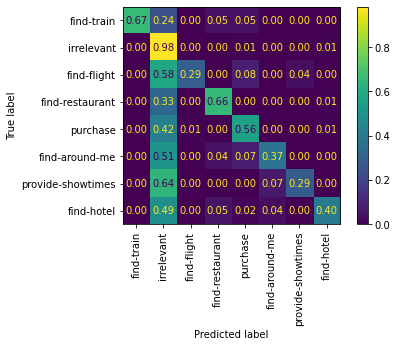

In [86]:
from itertools import product

#from ...base import is_classifier
plt.figure(figsize=(10,4))
plot_confusion_matrix(df_final["Predicted"], df_final["Intent"], labels=prediction_columns, normalize='true')

In [91]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(df_final["Intent"], df_final["Predicted"]))

                   precision    recall  f1-score   support

   find-around-me       0.86      0.37      0.52        67
      find-flight       0.88      0.29      0.44        24
       find-hotel       0.76      0.40      0.52        55
  find-restaurant       0.90      0.66      0.76        93
       find-train       0.93      0.67      0.78        21
       irrelevant       0.80      0.98      0.88       677
provide-showtimes       0.80      0.29      0.42        14
         purchase       0.82      0.56      0.67       114

         accuracy                           0.81      1065
        macro avg       0.84      0.53      0.62      1065
     weighted avg       0.82      0.81      0.79      1065



In [99]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(df_final["Intent"], df_final["Predicted"])

0.5270967720223785

In [109]:
from sklearn.metrics import roc_auc_score

"""
- 'ovr':

    Computes the AUC of each class against the rest [3] [4]. This treats the multiclass case in the same way as the multilabel     case. Sensitive to class imbalance even when average == 'macro', because class imbalance affects the composition of each       of the ‘rest’ groupings.
    
- 'ovo':
    Computes the average AUC of all possible pairwise combinations of classes [5]. 
    Insensitive to class imbalance when average == 'macro'
"""

print(roc_auc_score(df_final["Intent"],df_final[prediction_columns], multi_class="ovo", average='macro'))

0.5714192180801001


## Exercice 2

##### Réponse / idées : 

## Exercice 3

##### Réponse / idées : 

## Exercice 4

##### Réponse / idées : 

## Exercice 5

##### Réponse / idées : 